## Background
W. Avy likes your analysis, but he wants more information about temperature trends before opening the surf shop. Specifically, he wants temperature data for the months of June and December in Oahu, in order to determine if the surf and ice cream shop business is sustainable year-round.

## Methodology
- Deliverable 1: Determine the Summary Statistics for June
- Deliverable 2: Determine the Summary Statistics for December
- Deliverable 3: A written report for the statistical analysis (README.md)


In [5]:
#pip install dataframe-image

In [6]:
# Dependencies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

from sqlalchemy import extract

# import dataframe_image
import dataframe_image as dfi

In [7]:
engine = create_engine("sqlite:///./Resources/hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# what are the tables in the hawaii.sqlite db
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [10]:
# 1. Import the sqlalchemy extract function.
#from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temps = session.query(Measurement).filter(extract('month', Measurement.date) == 6).all()
#june_temps

In [11]:
#  3. Convert the June temperatures to a list.
june_temps_list = [temp.tobs for temp in june_temps]
june_temps_list[:5]

[78.0, 76.0, 78.0, 76.0, 77.0]

In [12]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temp_df = pd.DataFrame(june_temps_list, columns=['June Temps'])
june_temp_df

,June Temps
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0
...,...
1695,79.0
1696,74.0
1697,74.0
1698,76.0


### Exploratory Analysis of June Weather DataFrame

In [13]:
june_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   June Temps  1700 non-null   float64
dtypes: float64(1)
memory usage: 13.4 KB


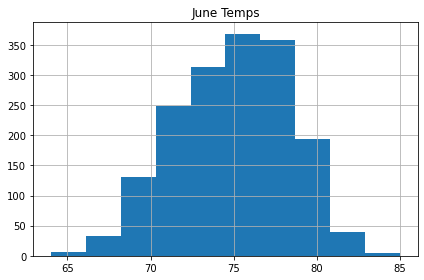

In [14]:
# plot a histogram
june_temp_df.hist()

# save as an image using  the savefig() method
plt.savefig("Images/June_temp_hist.png")
plt.tight_layout()

plt.show()

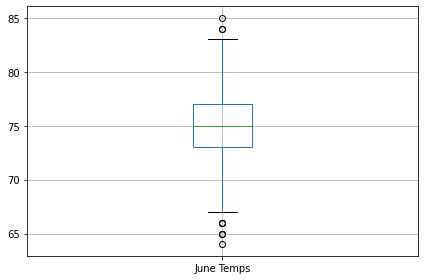

In [15]:
june_temp_df.boxplot()

# save as an image using  the savefig() method
plt.savefig("Images/june_temp_boxplot.png")
plt.tight_layout()

plt.show()

In [16]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temp_summary_stats = june_temp_df.describe()

# export as an image
dfi.export(june_temp_summary_stats, "Images/june_temp_summary_stats.png")

june_temp_summary_stats

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [17]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
december_temps = session.query(Measurement).filter(extract('month', Measurement.date) == 12).all()
#december_temps

In [18]:
# 7. Convert the December temperatures to a list.
december_temps_list = [temp.tobs for temp in december_temps]
december_temps_list[:5]

[76.0, 74.0, 74.0, 64.0, 64.0]

In [19]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
december_temp_df = pd.DataFrame(december_temps_list, columns=['December Temps'])
december_temp_df

,December Temps
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0
...,...
1512,71.0
1513,71.0
1514,69.0
1515,65.0


### Exploratory Analysis of December Weather DataFrame

In [20]:
december_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   December Temps  1517 non-null   float64
dtypes: float64(1)
memory usage: 12.0 KB


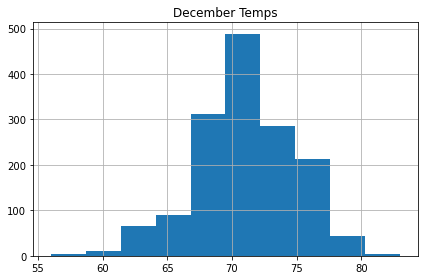

In [21]:
# plot a histogram
december_temp_df.hist()

# save as an image using  the savefig() method
plt.savefig("Images/December_temp_hist.png")
plt.tight_layout()

plt.show()

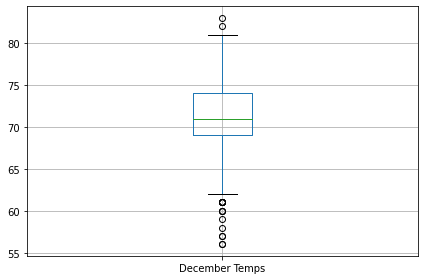

In [22]:
december_temp_df.boxplot()

# save as an image using  the savefig() method
plt.savefig("Images/december_temp_boxplot.png")
plt.tight_layout()

plt.show()

In [23]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
december_temp_summary_stats = december_temp_df.describe()

# export as an image
dfi.export(december_temp_summary_stats, "Images/december_temp_summary_stats.png")

december_temp_summary_stats

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## 2 Additional queries for the summary

In [24]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [25]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [26]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature least active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00518838').all()

[(58.0, 83.0, 72.72407045009784)]

### summary
- The most active station was USC00519281 with:
    - A total of 2772 data points.
    - An average temperature of 72°F, a max_temp of 84°F, and a min_temp of 54°F.
    
- The least active station was USC00518838 with:
    - A total of 511 data points.
    - An average temperature of 73°F, a max_temp of 83°F, and a min_temp of 58°F.
